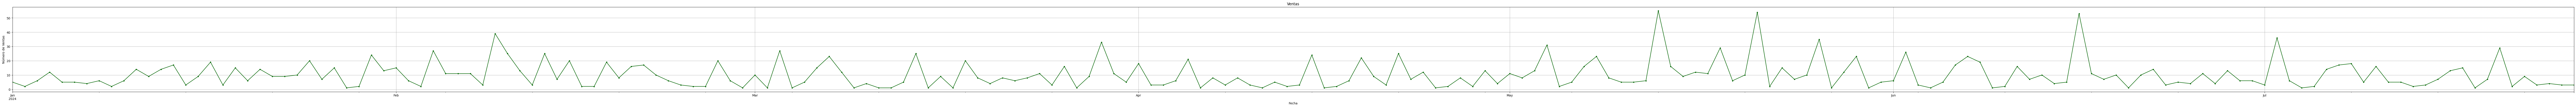

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leemos el archivo
file_path = '/content/compras.txt'
data = pd.read_csv(file_path, sep=',', header=None, names=['id_compra', 'id_cliente', 'id_pelicula', 'fecha'])

data['fecha'] = pd.to_datetime(data['fecha'])


#Ventas en un intervalo de tiempo
fecha_inicio = '2024-01-01'  # Ajustamos el intervalo
fecha_fin = '2024-09-29'
ventas_intervalo = data[(data['fecha'] >= fecha_inicio) & (data['fecha'] <= fecha_fin)]
ventas_intervalo_por_dia = ventas_intervalo.groupby('fecha').size()
plt.figure(figsize=(150, 5))
ventas_intervalo_por_dia.plot(kind='line', marker='.', color='darkgreen')
plt.title('Ventas')
plt.xlabel('Fecha')
plt.ylabel('Número de Ventas')
plt.grid(True)
plt.show()


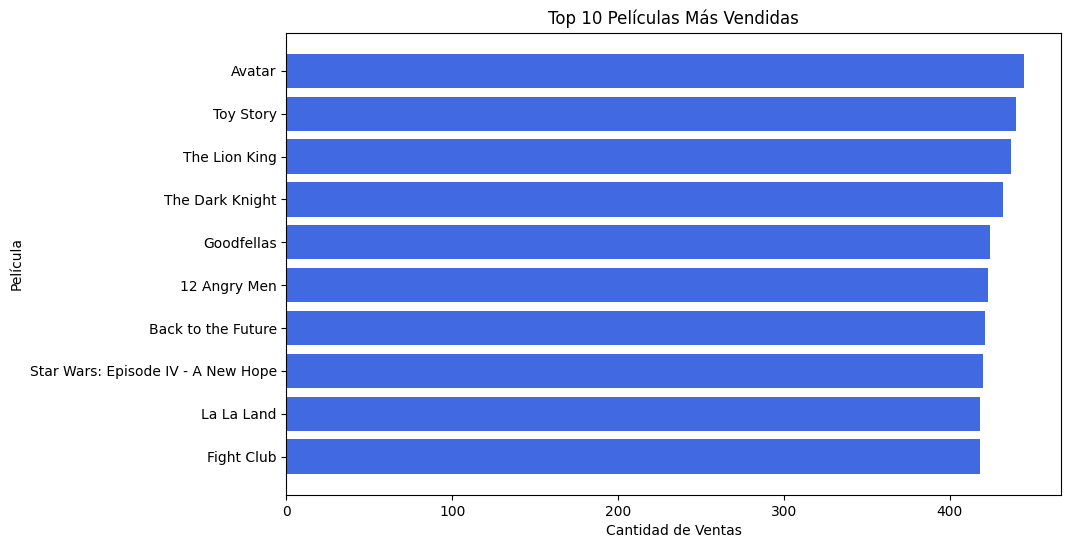

In [ ]:
peliculas_file_path = '/content/peliculas.txt'
compras_file_path = '/content/compras.txt'

peliculas = pd.read_csv(peliculas_file_path, sep=',', header=None, names=['id', 'titulo', 'director', 'año', 'genero', 'precio'])
compras = pd.read_csv(compras_file_path, sep=',', header=None, names=['id_compra', 'id_pelicula', 'id_cliente', 'fecha'])

# contamos el numero de ventas de cada pelicula
ventas_por_pelicula = compras['id_pelicula'].value_counts().reset_index()
ventas_por_pelicula.columns = ['id_pelicula', 'ventas']

# Unimos la información de ventas con los datos de películas
peliculas_vendidas = peliculas.merge(ventas_por_pelicula, left_on='id', right_on='id_pelicula', how='left')


# Ordenamos por ventas de mayor a menor
peliculas_vendidas = peliculas_vendidas.sort_values(by='ventas', ascending=False)

# Seleccionamos las 10 películas más vendidas
top_peliculas = peliculas_vendidas.head(10)

# Graficamos las películas más vendidas
plt.figure(figsize=(10, 6))
plt.barh(top_peliculas['titulo'], top_peliculas['ventas'], color='royalblue')
plt.title('Top 10 Películas Más Vendidas')
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Película')
plt.gca().invert_yaxis()  # Invertimos los ejes para que se muestre desde la mas vendida hasta la menos
plt.show()


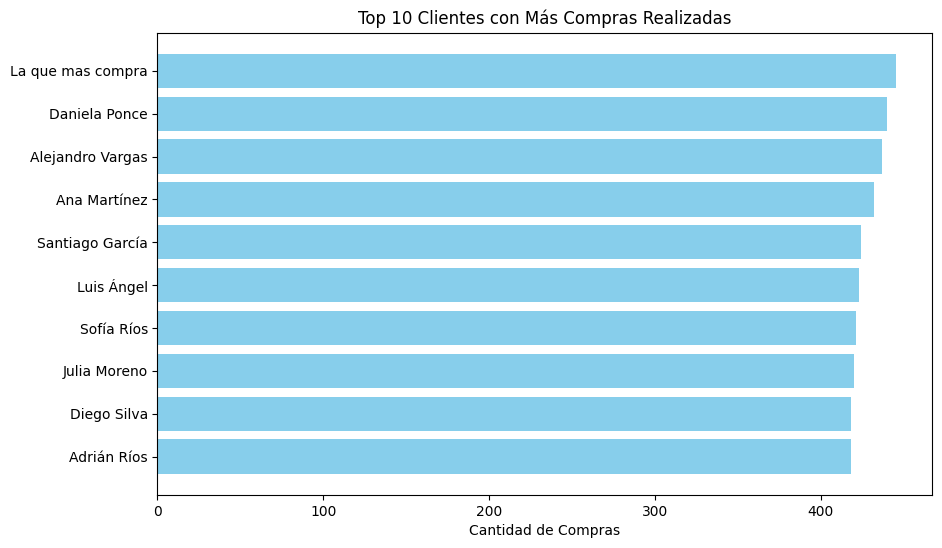

In [ ]:
compras = pd.read_csv('compras.txt', sep=',', names=['id_compra', 'id_cliente', 'id_pelicula', 'fecha_compra'])
clientes = pd.read_csv('clientes.txt', sep=',', names=['id_cliente', 'nombre', 'correo_electronico', 'direccion'])

# Contamos las compras por cliente
compras_por_cliente = compras['id_cliente'].value_counts().reset_index()
compras_por_cliente.columns = ['id_cliente', 'cantidad_compras']

# Unimos los datos de clientes con las compras
clientes_compras = pd.merge(compras_por_cliente, clientes, on='id_cliente')

# Seleccionamos los 10 clientes con más compras
top_clientes = clientes_compras.nlargest(10, 'cantidad_compras')

# Graficamos
plt.figure(figsize=(10, 6))
plt.barh(top_clientes['nombre'], top_clientes['cantidad_compras'], color='skyblue')
plt.xlabel('Cantidad de Compras')
plt.title('Top 10 Clientes con Más Compras Realizadas')
plt.gca().invert_yaxis()  # Invertimos el eje Y para mostrar el cliente con más compras en la parte superior
plt.show()
